In [25]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import math
import ugh
import pprint

# retina distplay
%matplotlib inline
# hidpi display
plt.rcParams['figure.dpi'] = 300
# turn on grid by default
plt.rcParams['axes.grid'] = True



In [22]:
# plot the curves
n1 = 1
n2 = 1.5
def rperp(theta: float) -> float:
    sinphi = n2/n1*math.sin(theta)
    if ( sinphi <= 1 ):
        phi = math.asin(sinphi)
        cosphi = math.cos(phi)
    else:
        phi = -999
        cosphi = -999
    costheta = math.cos(theta)
    rperp = (n2*cosphi - n1*costheta)/(n2*cosphi + n1*costheta)
    if ( phi == -999 ):
        rperp = -999
    return rperp

def rpara(theta:float)  -> float:
    sinphi = n2/n1*math.sin(theta)
    if ( sinphi <= 1 ):
        phi = math.asin(sinphi)
        cosphi = math.cos(phi)
    else:
        phi = -999
        cosphi = -999
    costheta = math.cos(theta)
    rpara = 2*n2*costheta/(n2*cosphi + n1*costheta)
    if ( phi == -999 ):
        rpara = -999
    return rpara


def tpara(theta: float) -> float:
    sinphi = n2/n1*math.sin(theta)
    if (sinphi <= 1):
        phi = math.asin(sinphi)
        cosphi = math.cos(phi)
    else:
        phi = -999
        cosphi = -999
    costheta = math.cos(theta)
    tpara = 2*n2*costheta/(n2*cosphi + n1*costheta)
    if (phi == -999):
        tpara = -999
    return tpara


def tperp(theta: float) -> float:
    sinphi = n2/n1*math.sin(theta)
    if (sinphi <= 1):
        phi = math.asin(sinphi)
        cosphi = math.cos(phi)
    else:
        phi = -999
        cosphi = -999
    costheta = math.cos(theta)
    tperp = 2*n2*costheta/(n2*costheta + n1*cosphi)
    if (phi == -999):
        tperp = -999
    return tpara


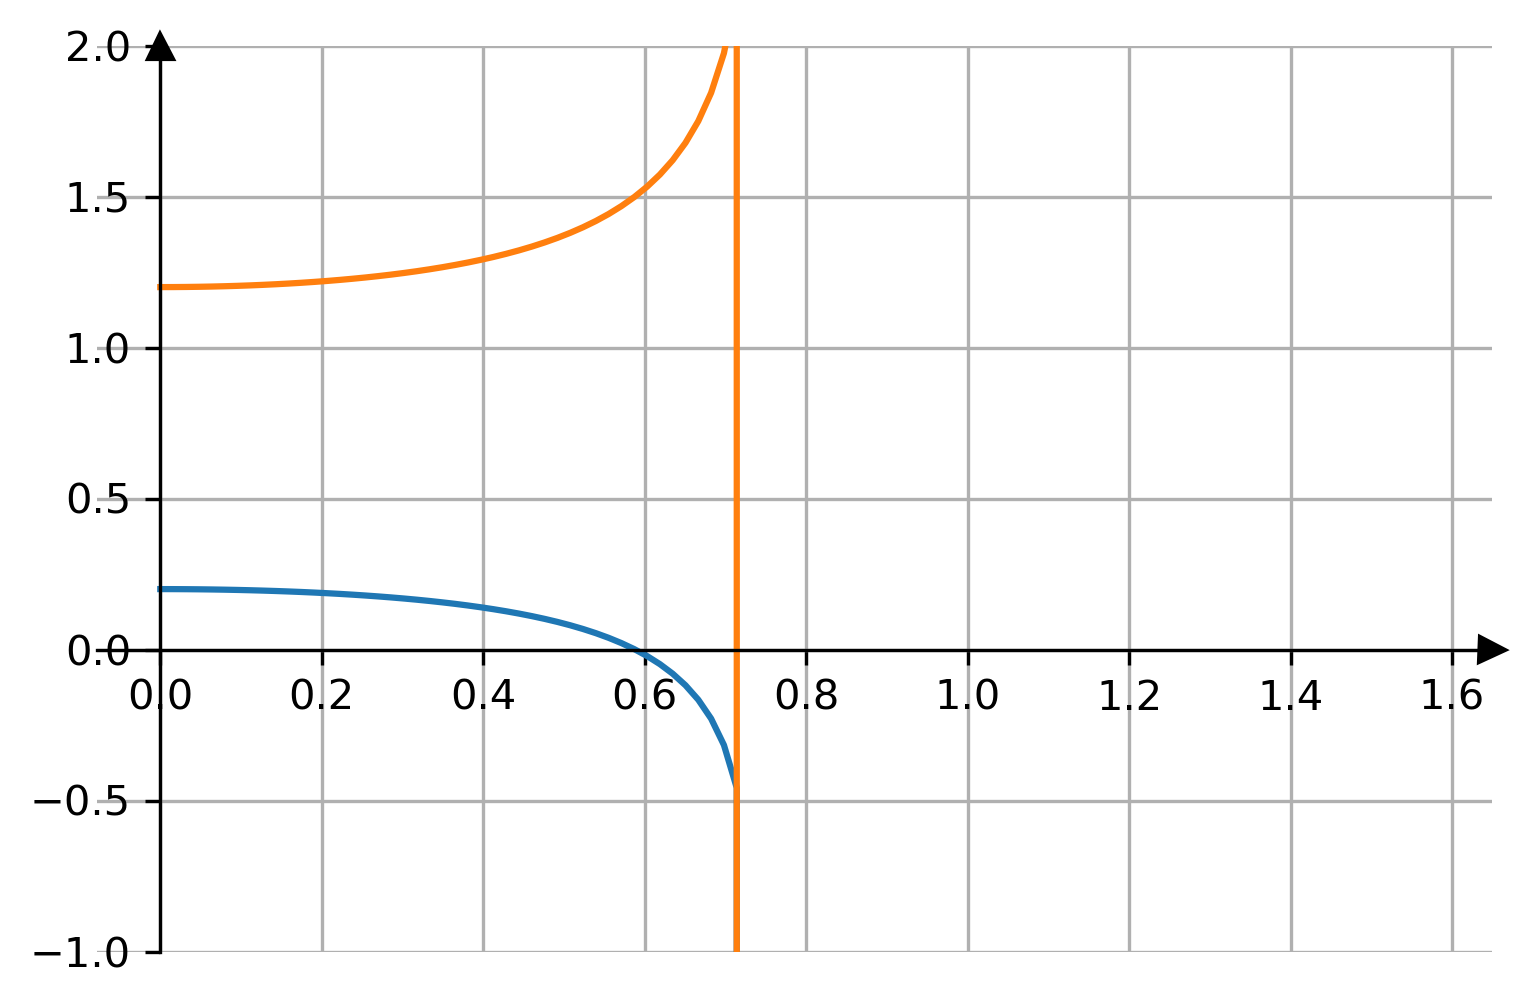

In [30]:
thetas = np.linspace(0, math.pi/2, 100)
#print(rperp(math.pi/2))
rperps = [rperp(theta) for theta in thetas]
plt.plot(thetas, rperps)
rparas = [rpara(theta) for theta in thetas]
plt.plot(thetas, rparas)
plt.ylim(-1, 2)
#pprint.pprint(rparas)
ugh.ugh()


In [6]:
## trying to make these plots
## https://www.acs.psu.edu/drussell/Demos/refract/refract.html

# pretty sure this is wrong 
# 

def speed_y(y: float) -> float:
    """
    speed of sound varies with height (y axis)
    """
    c = 331.4 # m/s
    return c + 1.05*y

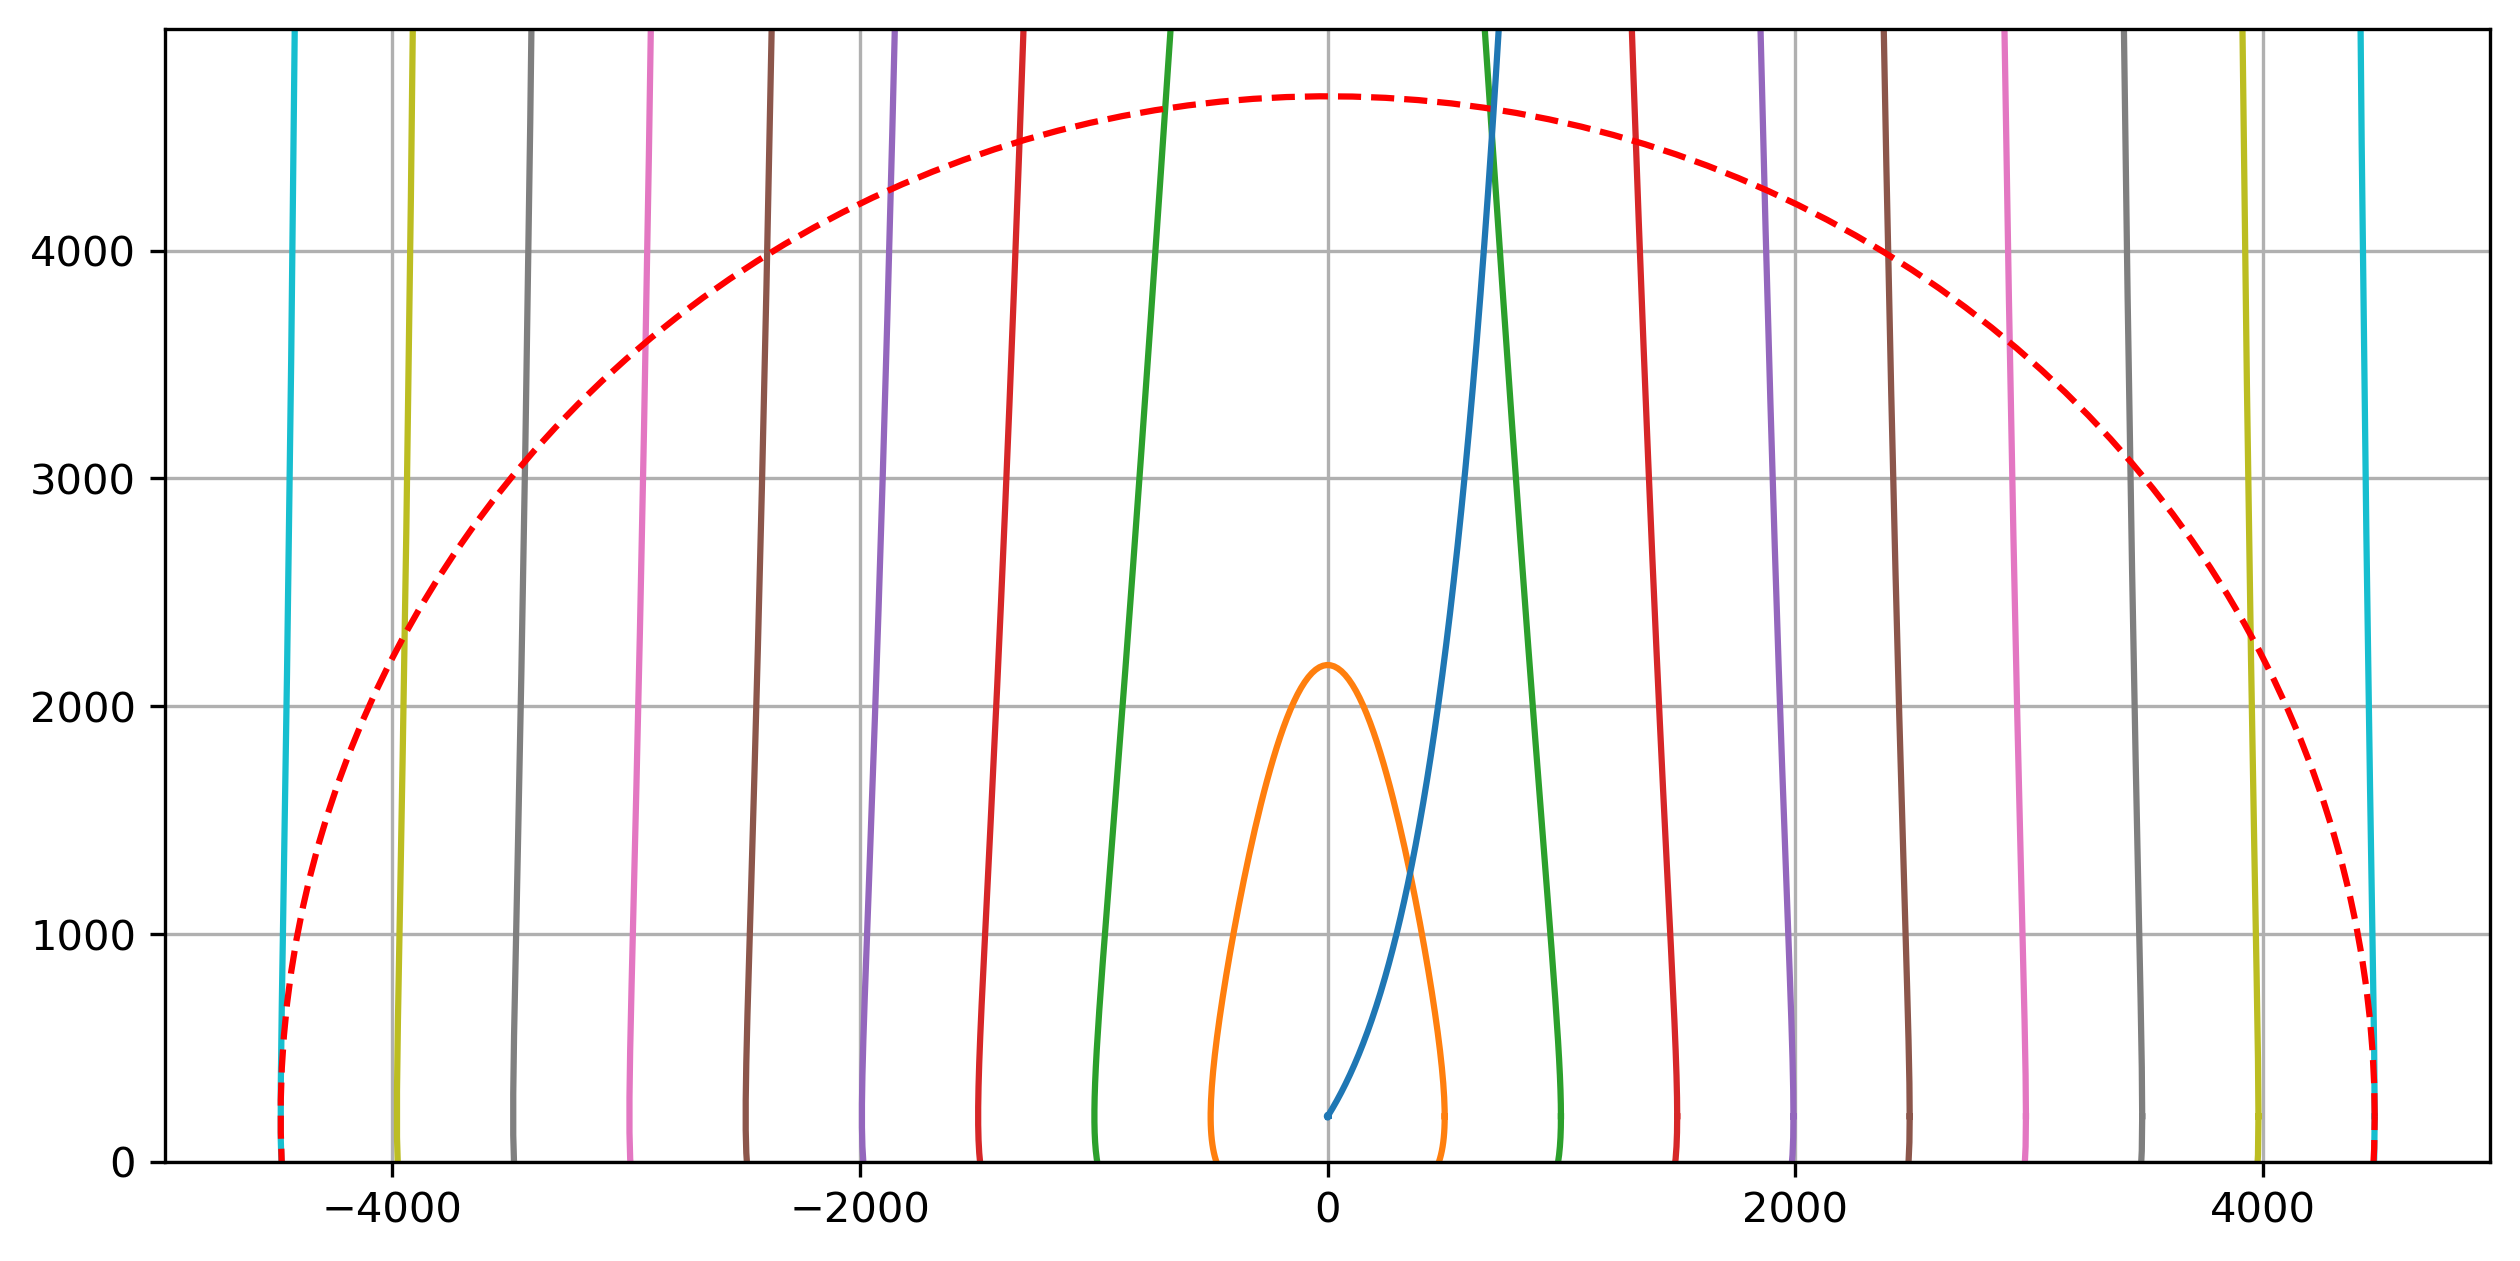

In [7]:
plt.Circle((5, 5), radius=50, color='b')
# set of x, y positions as function of angle
npoints = 200 
# speed of sound at some reference temperature
c = 331.4 # m/s
# spherical wave emanates from here (center of circle if v_x = v_y)
x0 = 0
y0 = 200
# we have npoints points, which are the position of the 
# sphere radiating out from (x0,y0) at t=0
angles = np.linspace(0, 2*math.pi, npoints)
# point at (x[i], y[i]) corresponds to angle angle[i] from (x0,y0)
# i.e., angle[0] is along x axis
x = np.zeros(npoints)
y = np.zeros(npoints)
# all points of sound originate at the center
x.fill(x0)
y.fill(y0)
# next three lines are unused
radius = 50
ycirc = radius * np.sin(angles)
xcirc = radius * np.cos(angles)
#
# time step distance
dt = 0.01
# how many time steps
ntimes = 1500

# path
path_x = []
path_y = []
for j in range(ntimes):
    for i, angle in enumerate(angles):
       #print( i, angle)
        x[i] += c * dt*math.cos(angle)
        y[i] += speed_y(y[i]) * dt*math.sin(angle)
    path_x.append(x[1*npoints//8])
    path_y.append(y[1*npoints//8])
    # plot the wave front at a certain time n times
    if ( j %(ntimes//10)== 0):
        plt.plot(x, y)
        radius = (j+1)*dt*c
        
maxdist = (j+1)*dt*c
plt.ylim(0,maxdist)
plt.xlim(-maxdist,maxdist)
# draw the circle that would be if v_x = v_y
ycirc = radius * np.sin(angles) + y0
xcirc = radius * np.cos(angles) + x0
plt.plot(xcirc, ycirc, 'r--')
# set figure to be square
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.plot(path_x,path_y)
plt.savefig('lec18_sound_overlay.png')

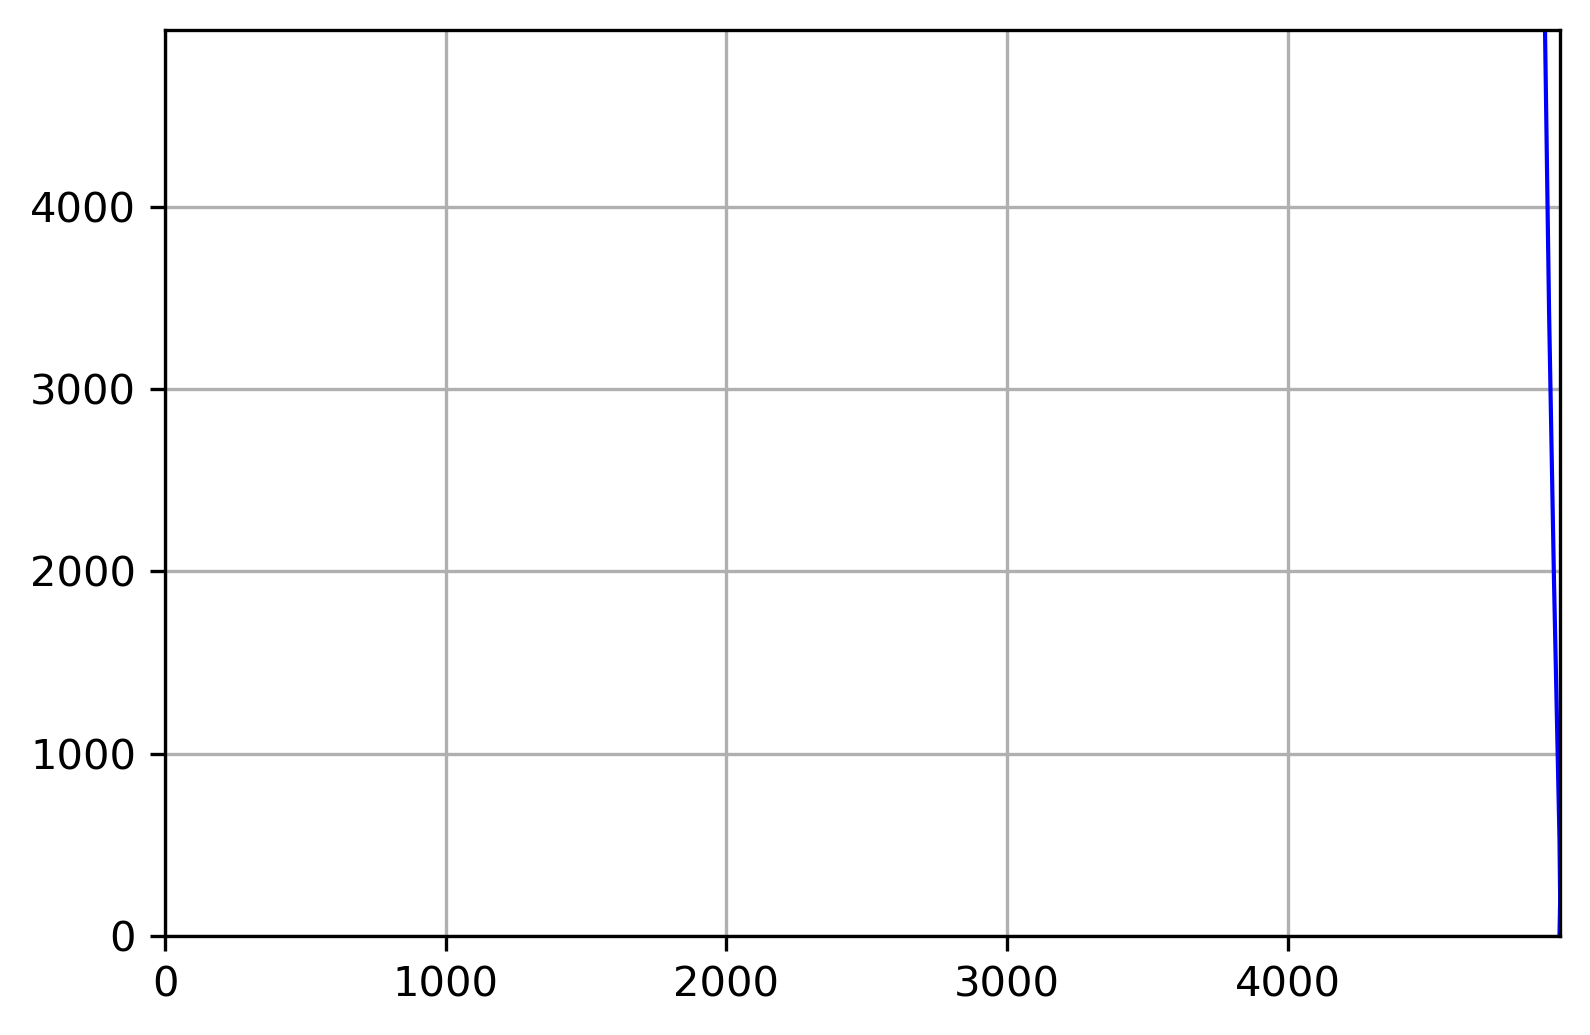

In [8]:
# initializing a line variable
# initializing a figure in
# which the graph will be plotted
fig = plt.figure()
# marking the x-axis and y-axis
axis = plt.axes(xlim=(0, maxdist),
                ylim=(0, maxdist))

line, = axis.plot([], [], 'b-', lw=1)

# reset variables
x = np.zeros(npoints)
y = np.zeros(npoints)
x.fill(x0)
y.fill(y0)
angles = np.linspace(0, 2*math.pi, npoints)
radius = 50


def plotter(t: int) -> np.ndarray:
    for i, angle in enumerate(angles):
        x[i] += c * dt*math.cos(angle)
        y[i] += speed_y(y[i]) * dt*math.sin(angle)
    line.set_data(x, y)
    return line,

# data which the line will
# contain (x, y)


def init():
    line.set_data([], [])
    return line,


anim = FuncAnimation(fig, plotter, init_func=init,
                     frames=ntimes, interval=dt, blit=True)


anim.save('test_sounds.mp4',
          writer='ffmpeg', fps=24, dpi=100)
